Weak perturbation
=================

new version 2026

In this numerical experiment, one considers the propagation of a small perturbation in a collisionless plasma model. The perturbation is initiated by a thin slab of fluid slowly moving with respect to the surrounding resting fluid. The slab is translationally invariant in the $y$ direction and moving in the $x$ direction.

The perturbation is said to be "small" because the initial speed of the slab is small with respect to the ion acoustic speed. In such a case, the mode is linear and we aim in this practical work to calculate the speed at which this small perturbation is propagating and verify that it is the ion acoustic speed.

In [1]:
import os
import sys

In [2]:
home = os.environ['HOME']
weak_path = os.path.join(home, 'far/farTeach/2026/weak')
phare_path = os.path.join(home, 'far/PHARE')

In [3]:
import subprocess
import pyphare
import matplotlib.pyplot as plt
from pyphare.pharesee.run import Run
from pyphare.core.operators import dot, cross, sqrt, modulus, grad
from pyphare.core.ufuncs import gFilt, peakIds
import numpy as np

In [4]:
# phare_root = os.path.expanduser(phare_path)
# sys.path.append(os.path.join(phare_root, "pyphare"))
sys.path.append(os.path.join(phare_path, "pyphare"))

## Run the `PHARE` code

In [5]:
Te = 0.0  # default value

In [6]:
run_path = os.path.join(weak_path, 'wp_{0}'.format(Te))
print(run_path)

/home/smets/far/farTeach/2026/weak/wp_0.0


In [7]:
if os.path.isdir(run_path):
    files = os.listdir(run_path)
else:
    files = []

In [8]:
if 'ions_charge_density.h5' not in files :
    # subprocess.call(['/usr/bin/python3', run_path+'/wp.py'])
    subprocess.call(['mpirun', '-n', '4', '/usr/bin/python3', weak_path+'/wp.py', str(Te)])

validating dim=1
validating dim=1
validating dim=1
Error: cannot use density without population name
Error: cannot use density without population name
Error: cannot use density without population name
validating dim=1
Error: cannot use density without population name
mean advance time = 0.00179228157997131355.85sec
total advance time = 0:00:35.845632


In [9]:
run  = Run(run_path)

In [10]:
times = np.asarray((0, 20, 40, 60, 80, 100))

In [11]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

nb_ghosts (2) < sigma (6) : your gaussian filter might be dirty


NameError: name 'time' is not defined

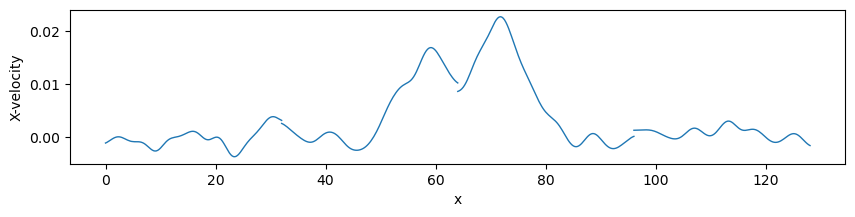

In [12]:
fig, ax = plt.subplots(figsize=(10,2))

V = run.GetVi(time = 40.0)
v = gFilt(V, sigma=6)
pks = peakIds(v, height=0.02)
v.plot(qty='x', ax=ax, ls='solid', lw=1.0, color=colors[0], ylabel='X-velocity')
print(time, pks)
for p in pks:
    ax.axvline(x=p, color='black', linestyle='dotted')

In [ ]:
fig, ax = plt.subplots(figsize=(10,2))

for i, time in enumerate(times):
    V = run.GetVi(time)
    v = gFilt(V, sigma=6)
    pks = peakIds(v, height=0.02)
    v.plot(qty='x', ax=ax, ls='solid', lw=1.0, color=colors[i], ylabel='X-velocity')
    print(time, pks)
    for p in pks:
        ax.axvline(x=p, color='black', linestyle='dotted')

## Misc functions to get data

In [ ]:
def get_velocities(r, times, sigma):
    for it,t in enumerate(times):
        Vi = r.GetVi(t, merged=True)
        print(type(Vi), dir(Vi), type(Vi['x']))
        Vix = Vi["x"][0]
        xV = Vi["x"][1][0]
        v = gaussian_filter1d(Vix(xV), sigma)
        if it==0 :
            vt = np.zeros((len(v),len(times)))
        vt[:,it] = v
    return xV, vt

# WP1

In [ ]:
Te = 0.05  # default TE value
path = root_path+"/"+"wp_0.05"

In [ ]:
times = np.asarray((0, 20, 40, 60, 80, 100))
r = Run(path)
x, Vs = get_velocities(r, times, sigma=6)

In [ ]:
positions, amplitudes = get_peaks(x,Vs)
profiles(times, x, Vs, positions, Te)

In [ ]:
propagation(times, positions, Te)

In [ ]:
damping(times, amplitudes)

In [ ]:
time=100
r = Run(root_path+"/"+"wp1")
ions = r.GetParticles(time, ["protons",])
fig, ax1 = plt.subplots(figsize=(10,4))
p,f = ions.dist_plot(axis=("x", "Vx"),
                     ax=ax1,            # default creates the figure
                     norm = 0.4,     # max value, min is 0
                     finest=True,  # only consider finest particles possible
                     gaussian_filter_sigma=1,
                     vmin=-1,vmax=1,
                     dv=0.01,
                     title="weak perturbation at time : {:.2f}".format(time), # figure title
                    )

In [ ]:
Te = 0.05
Ti = 0.01
Gamma_e = 1
Gamma_i = 3
print("ion acoustic speed : ", np.sqrt(Gamma_e*Te+Gamma_i*Ti))